## Playing w/ scipy.stats

Scipy Tutorial:<br>
https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#special-tests-for-normal-distributions

In [290]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pkg_resources

In [291]:
modules = 'scipy,matplotlib,numpy,seaborn'.split(',')
for mod in modules:
    version = pkg_resources.get_distribution(mod).version
    print('{}: {}'.format(mod, version))

scipy: 1.1.0
matplotlib: 3.0.0
numpy: 1.14.0
seaborn: 0.9.0


#### Scipy.stats offers a wide variety of discrete and continuous distributions. <br>
Let's see some

In [133]:
"""
distributions can be define simply
stats.[name_of_distribution](**kwargs)

Note: 
**kwargs = keyword_arguments 
*args = arguments (values)
"""

# define normal distribution
normal = stats.norm(loc=0, scale=1)
normal

In [139]:
"""
To draw a sample from a distribution,
OR to draw an outcome from a distribution,
OR a realization of a random variable (rv) which follows a certain distribution
(all mean the same thing)

we write

stats.norm(**kwargs).rvs(size=NUMBER)
OR
normal.rvs(size=NUMBER)

Size specifies how many draws we want
Returns - numpy array of size NUMBER
"""
sample = normal.rvs(size=4)
print(sample.size)
print(sample)

4
[ 1.05354341  0.01592683 -1.01197736  0.00882411]


In [164]:
"""
Taking a step back, what is a distribution in a statistical context?

(Ignoring jargon)
A distribution tells you the probability of getting a value from a range of possible values which are
gathered from a repeatable experiment, natural process, etc.

Let's look the two categories for distributions and give examples:
1. discrete distributions
2. continuous distributions
"""
# https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_bernoulli.html

bern = stats.bernoulli(p=0.5)
sample_bern = bern.rvs(size=100)
print('first 10 coint filps: ', sample_bern[:10])

"""
Above we defined Bernoulli's distribution and it's discrete
What does discrete mean?

A distribution is discrete when all the possible outcomes, or values, can be counted.
An example, and what bern can model, is a flip of coin. Only two possible outcomes
which are heads/tails, or to make it countable 0/1. Each having a 0.5, or 50%, chance of occurring.

A continuous distribution, on the other hand, is not countable.
An example is temperature. Sure the thermometer can say it's 68F, that's an aproximation. It can be 68.0001F, 68.00001F, and
so on, with the point being that there's too many values to count.
"""

temp = stats.norm(loc=68, scale=1)
sample_temp = temp.rvs(size=10)
print('first 10 temp samples: \n', sample_temp[:10])

first 10 coint filps:  [1 0 0 1 0 0 1 1 0 1]
first 10 temp samples: 
 [66.18738934 68.92011726 67.92007188 66.90099765 68.81974357 67.2689687
 66.84677641 67.99885604 67.61509052 67.27669978]


In [156]:
foo = bern.rvs(size=100)
foo[foo ==0].size

57

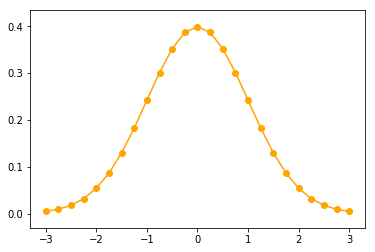

In [10]:
# getting probability for values ranging from -3σ to 3σ

def normal_pdf(mean=0, var=1):
    x = np.linspace(-3*var, 3*var, 25)
    y = normal.pdf(x)
    
    return x, y
x, y = normal_pdf()
plt.scatter(x, y, color='orange')
plt.plot(x, y, color='orange')
#plt.axvline(x=0, ymax=0.9, linestyle='--', color='k')
#plt.xticks(range(-10, 10))
plt.show()

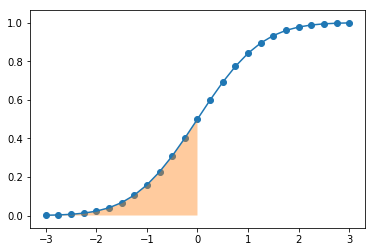

In [144]:
def normal_cdf(mean=0, var=1):
    x = np.linspace(-3*var, 3*var, 25)
    y = normal.cdf(x)
    
    return x, y

x,y = normal_cdf()
plt.scatter(x, y)
plt.plot(x, y)
plt.fill_between(x=x[:13], y1=y[:13], alpha=0.4)
plt.show()

In [94]:
a = np.polyfit(x=normal_sample, y=unknown_sample, deg=1)
slope, y_int, *_ = stats.linregress(x=normal_sample, y=unknown_sample)

Below we can see that our "unknown" distribution can be treated as a normal since it looks like a straight line.


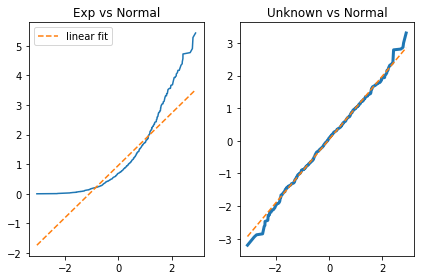

In [125]:
"""
Normality test:
1. Take sample data and sort it
2. Generate rvs from a normal distribution of size sample data and sort it
3. Plot
Result:
Straight line implies sample data can be treated as a normal distribution
"""
# exponential distribution & samples
exp = stats.expon(loc=0, scale=1)  
exp_sample = exp.rvs(size=1000)

# we image that we don't know it's normal
unknown_sample = normal.rvs(size=1000)  

# normal sample
normal_sample = normal.rvs(size=1000)

# sort
exp_sample.sort()
unknown_sample.sort()
normal_sample.sort()

# line fitting aka linear regression
def linear_fit(x, y):
    
    slope, y_intercept, *_ = stats.linregress(x, y)
    line = slope * x + y_intercept
    return line
     
# plotting
fig, axes = plt.subplots(1, 2, sharex=True,)
    
axes[0].plot(normal_sample, exp_sample)
axes[0].plot(normal_sample, linear_fit(normal_sample, exp_sample), '--', label='linear fit')
axes[0].set_title('Exp vs Normal')

axes[1].plot(normal_sample, unknown_sample, linewidth=3)
axes[1].plot(normal_sample, linear_fit(normal_sample, unknown_sample), '--', label='linear fit')
axes[1].set_title('Unknown vs Normal')
axes[0].legend()
fig.tight_layout()


print('Below we can see that our "unknown" distribution can be treated as a normal \
since it looks like a straight line.')

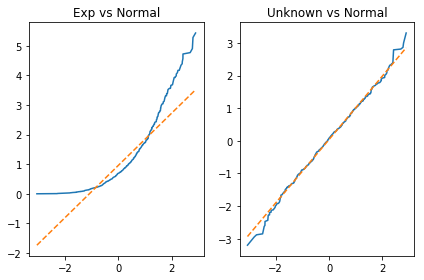

In [127]:
# cleaner plotting

fig, axes = plt.subplots(1, 2, sharex=True,)
samples = [exp_sample, unknown_sample]
titles = ['Exp vs Normal', 'Unknown vs Normal']
for ax, s, t in zip(axes, samples, titles):
    ax.plot(normal_sample, s)
    ax.plot(normal_sample, linear_fit(normal_sample, s), '--', label='linear fit')
    ax.set_title(t)
    
fig.tight_layout()    

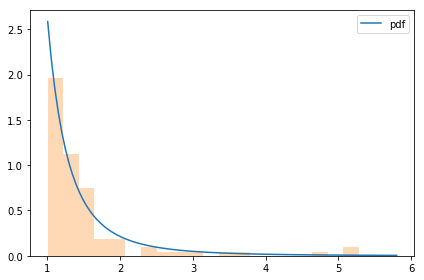

In [293]:
# pareto distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html
par = stats.pareto(b=b)

xs = np.linspace(par.ppf(0.01), par.ppf(0.99), 100)
sample_pareto = par.pdf(xs)

plt.plot(xs, sample_pareto, label='pdf')
plt.hist(par.rvs(size=100), alpha=0.3, bins=20, density=True)
plt.legend()
plt.tight_layout()

In [262]:
"""
Parameters:
pdf - numpy array w/ draws from a pdf
Returns:
cdf - numpy array w/ decimal values corresponding to percentages
"""
def get_cdf(pdf):
    pdf.sort()
    cdf = np.array([(pdf[pdf<=val].size / pdf.size) for val in pdf])
    return cdf

In [334]:
par.cdf(xs)

array([0.01      , 0.12498422, 0.22230378, 0.30528035, 0.37650569,
       0.4380234 , 0.49146051, 0.53812399, 0.57907243, 0.61516976,
       0.6471261 , 0.67552903, 0.70086773, 0.72355185, 0.74392631,
       0.76228298, 0.77887009, 0.79389968, 0.80755366, 0.81998875,
       0.83134046, 0.84172641, 0.85124905, 0.85999789, 0.86805143,
       0.87547866, 0.88234043, 0.88869055, 0.89457673, 0.90004137,
       0.90512225, 0.9098531 , 0.91426412, 0.91838241, 0.92223231,
       0.92583574, 0.92921249, 0.93238045, 0.93535582, 0.9381533 ,
       0.94078623, 0.94326677, 0.945606  , 0.94781404, 0.94990012,
       0.95187273, 0.95373961, 0.9555079 , 0.95718414, 0.95877436,
       0.96028413, 0.96171855, 0.96308237, 0.96437996, 0.96561537,
       0.96679235, 0.96791438, 0.9689847 , 0.97000632, 0.97098201,
       0.97191439, 0.97280588, 0.97365874, 0.97447508, 0.97525688,
       0.97600597, 0.97672409, 0.97741284, 0.97807376, 0.97870824,
       0.97931764, 0.9799032 , 0.9804661 , 0.98100744, 0.98152

In [336]:
sample_pareto

array([0.00451796, 0.00465724, 0.00480205, 0.00495266, 0.00510935,
       0.00527241, 0.00544218, 0.00561899, 0.0058032 , 0.00599518,
       0.00619535, 0.00640412, 0.00662195, 0.00684933, 0.00708678,
       0.00733482, 0.00759406, 0.0078651 , 0.00814861, 0.0084453 ,
       0.00875591, 0.00908125, 0.00942218, 0.00977962, 0.01015454,
       0.010548  , 0.01096113, 0.01139514, 0.01185132, 0.01233107,
       0.01283588, 0.01336736, 0.01392726, 0.01451744, 0.01513991,
       0.01579685, 0.01649061, 0.01722374, 0.01799897, 0.0188193 ,
       0.01968795, 0.02060842, 0.02158454, 0.02262045, 0.02372065,
       0.02489007, 0.02613409, 0.02745856, 0.02886992, 0.03037518,
       0.03198207, 0.03369905, 0.03553544, 0.03750149, 0.03960851,
       0.04186898, 0.04429673, 0.04690705, 0.04971693, 0.05274522,
       0.05601293, 0.05954349, 0.06336307, 0.06750098, 0.07199006,
       0.07686727, 0.08217417, 0.08795773, 0.09427105, 0.10117435,
       0.10873606, 0.11703419, 0.12615784, 0.1362091 , 0.14730

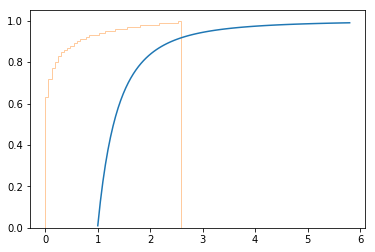

In [346]:
# pareto cdf
#plt.plot(xs, get_cdf(sample_pareto))
plt.plot(xs, par.cdf(xs))
sns.distplot(a=par.pdf(xs), hist_kws={"cumulative":True, 'histtype':'step'}, kde=False, norm_hist=True)

In [265]:
ccdf_pareto = 1 - get_cdf(sample_pareto)

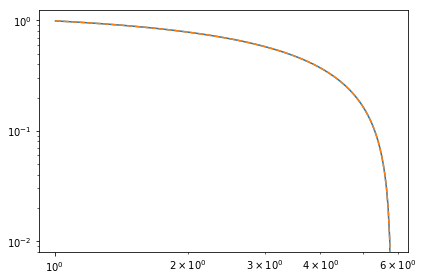

In [279]:
"""
Visual inspection
Does my data follow a pareto distribution?

1. Get complentary CDF or CCDF of distribution (1-CDF)
2. Plot in loglog scale
3. If straight line, then visually pareto is can model distribution
"""

# ideal scenario
plt.loglog(xs, ccdf_pareto, label='pdf')
plt.plot(xs, linear_fit(xs, ccdf_pareto), '--', label='linear fit')
plt.tight_layout()

In [287]:
linear_fit(xs, ccdf_pareto)

0.9700000000000001

In [286]:
ccdf_pareto[2]

0.97